# Description
This is a Gender Classification model that will output the gender of an individual based on their face.

## Example Output
Input: an image of people

Output: image marked with classification boxes labeling their genders.

## How Good Is This Model?
The model is very good, with gender classification test accuracy of 96%.

## Misc
The Model was trained on the IMDB dataset. 

This model should be downloaded from the source: https://github.com/oarriaga/face_classification 

## Check out the tutorial below! 
The tutorial demonstrates using the model on a single image.


## Download Code,Weights, and some test images from the github source

In [1]:
!git clone https://github.com/oarriaga/face_classification.git

Cloning into 'face_classification'...
remote: Enumerating objects: 704, done.
remote: Total 704 (delta 0), reused 0 (delta 0), pack-reused 704
Receiving objects: 100% (704/704), 121.26 MiB | 2.30 MiB/s, done.
Resolving deltas: 100% (376/376), done.


## Install Dependencies

In [2]:
!pwd

/Users/jerry.chi/git/CADL


In [0]:
!pip3 install -r face_classification/requirements.txt # package requirements
!pip3 install h5py
!pip3 install matplotlib



In [1]:
%cd face_classification/src

/Users/jerry.chi/git/CADL/face_classification/src


## Import all necessary modules to script

In [13]:
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

In [2]:
import sys

import cv2
from keras.models import load_model
import numpy as np

from IPython.display import Image, display
from utils.datasets import get_labels
from utils.inference import detect_faces
from utils.inference import draw_text
from utils.inference import draw_bounding_box
from utils.inference import apply_offsets
from utils.inference import load_detection_model
from utils.inference import load_image
from utils.preprocessor import preprocess_input

Using TensorFlow backend.


## Set up paths for Images and Weights

In [3]:


# parameters for loading data and images
image_path = '../images/test_image.jpg'
detection_model_path = '../trained_models/detection_models/haarcascade_frontalface_default.xml'
emotion_model_path = '../trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5'
gender_model_path = '../trained_models/gender_models/simple_CNN.81-0.96.hdf5'
emotion_labels = get_labels('fer2013')
gender_labels = get_labels('imdb')
font = cv2.FONT_HERSHEY_SIMPLEX

## Set up Face-bounding boxes

In [10]:
gender_labels

{0: 'woman', 1: 'man'}

In [4]:
# hyper-parameters for bounding boxes shape
gender_offsets = (30, 60)
gender_offsets = (10, 10)
emotion_offsets = (20, 40)
emotion_offsets = (0, 0)

## Load Models using weight paths

In [5]:
# loading models
face_detection = load_detection_model(detection_model_path)
emotion_classifier = load_model(emotion_model_path, compile=False)
gender_classifier = load_model(gender_model_path, compile=False)

# getting input model shapes for inference
emotion_target_size = emotion_classifier.input_shape[1:3]
gender_target_size = gender_classifier.input_shape[1:3]

## Load Images

In [33]:
# loading images
rgb_image = load_image(image_path, color_mode='rgb')
gray_image = load_image(image_path, color_mode='grayscale')
gray_image = np.squeeze(gray_image)
gray_image = gray_image.astype('uint8')

In [34]:
type(rgb_image)

numpy.ndarray

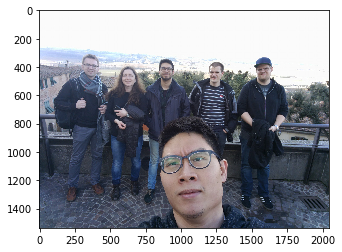

In [29]:
plt.imshow(rgb_image.astype(int))

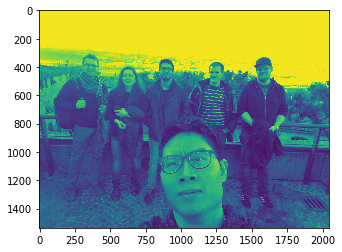

In [32]:
plt.imshow(gray_image)

## Preprocess and Run models

In [30]:
faces = detect_faces(face_detection, gray_image)
for face_coordinates in faces:
    x1, x2, y1, y2 = apply_offsets(face_coordinates, gender_offsets)
    rgb_face = rgb_image[y1:y2, x1:x2]

    x1, x2, y1, y2 = apply_offsets(face_coordinates, emotion_offsets)
    gray_face = gray_image[y1:y2, x1:x2]

    try:
        rgb_face = cv2.resize(rgb_face, (gender_target_size))
        gray_face = cv2.resize(gray_face, (emotion_target_size))
    except:
        continue

    rgb_face = preprocess_input(rgb_face, False)
    rgb_face = np.expand_dims(rgb_face, 0)
    gender_prediction = gender_classifier.predict(rgb_face)
    print(gender_prediction)
    print(gender_prediction[0][1])
    gender_label_arg = np.argmax(gender_prediction)
    gender_text = gender_labels[gender_label_arg] + str(gender_prediction[0][1])
    print(gender_text)

    gray_face = preprocess_input(gray_face, True)
    gray_face = np.expand_dims(gray_face, 0)
    gray_face = np.expand_dims(gray_face, -1)
    emotion_label_arg = np.argmax(emotion_classifier.predict(gray_face))
    emotion_text = emotion_labels[emotion_label_arg]
    
    
    if gender_text == gender_labels[0]:
        color = (0, 0, 255)
    else:
        color = (255, 0, 0)
    

    draw_bounding_box(face_coordinates, rgb_image, color)
    draw_text(face_coordinates, rgb_image, gender_text, color, 0, -20, 1, 2)
    

[[0.1429291 0.8570709]]
0.8570709
man0.8570709
[[0.17724758 0.8227525 ]]
0.8227525
man0.8227525
[[0.36838454 0.6316154 ]]
0.6316154
man0.6316154
[[0.6973821 0.302618 ]]
0.302618
woman0.302618
[[0.04498519 0.95501477]]
0.95501477
man0.95501477
[[0.444648   0.55535203]]
0.55535203
man0.55535203
[[0.31927252 0.6807275 ]]
0.6807275
man0.6807275
[[0.3388428 0.6611572]]
0.6611572
man0.6611572
[[0.12239208 0.8776079 ]]
0.8776079
man0.8776079


## Print Image To See Inference!

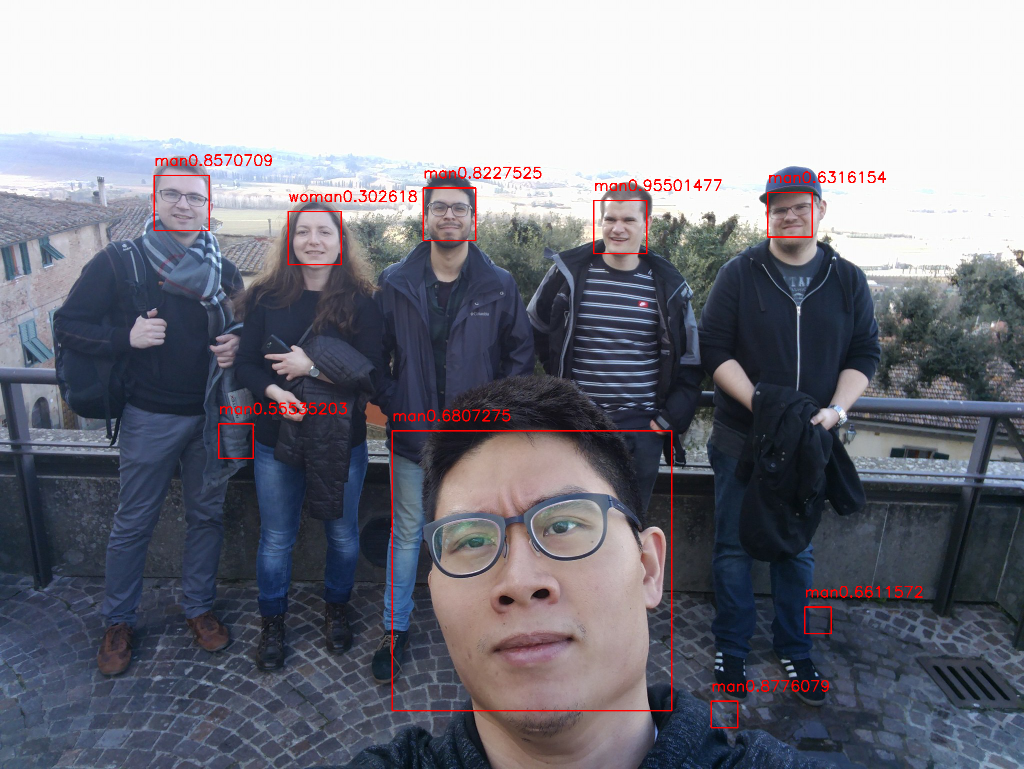

In [31]:
bgr_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2BGR)
resized_image = cv2.resize(bgr_image, (1024, 769)) 
cv2.imwrite('../images/predicted_test_image.png', resized_image)

display(Image(filename='../images/predicted_test_image.png'))

# References
Publication: https://github.com/oarriaga/face_classification/blob/master/report.pdf

Source: https://github.com/oarriaga/face_classification